# Testing the bipolar pulser `20171028a`

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import math
from matplotlib import colors as mcolors

RawData = "0_200_3_200.DAT"
f = open(RawData, "r")
a = np.fromfile(f, dtype=np.uint32)
t = a[-1]
V = a[:-1].copy()

Fech = 100000.0*len(V)/t # in MHz

print Fech



25.8998172794


In [204]:
#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map



def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC1len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC1len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

In [205]:
M = GetV2(V)[0]
M2 = GetV1(V)[0]
Ma = M - np.average(M[5000:7000])
Mb = M2 - np.average(M2[5000:7000])

In [206]:
rawSig = []
for k in range(len(Ma)):
    rawSig.append(Mb[k])
    rawSig.append(Ma[k])
rawSig = rawSig - np.average(rawSig)


In [207]:
colors = ["m","pink","chartreuse","red","k","lime","cyan","c","y"]

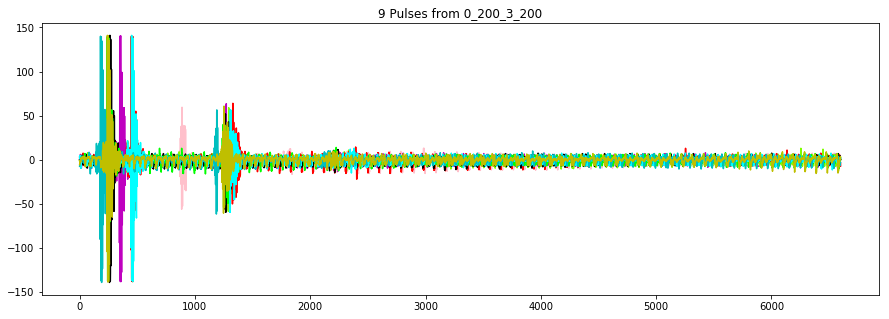

In [208]:
plt.figure(figsize=(15,5))
for k in range(9):
    s = k*10000
    plt.plot(rawSig[s+500:s+7100],colors[k])  

plt.title('9 Pulses from '+RawData.split(".")[0])
plt.savefig('Pulses_'+RawData.split(".")[0]+'.jpg', bbox_inches='tight')
plt.show()

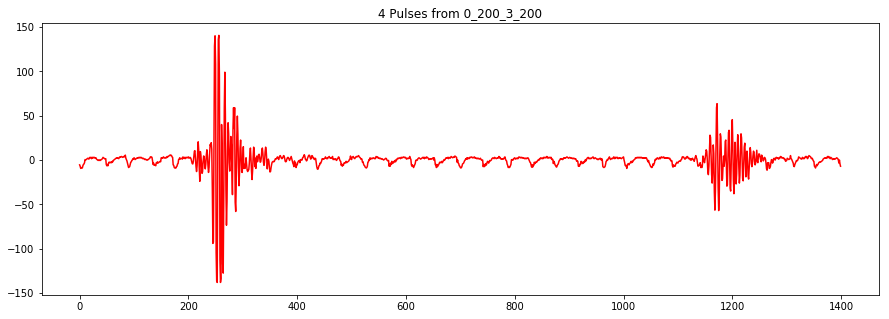

In [209]:
plt.figure(figsize=(15,5))

plt.plot(rawSig[600:2000],"r") 


plt.title('4 Pulses from '+RawData.split(".")[0])
plt.savefig('Pulses_details_'+RawData.split(".")[0]+'.jpg', bbox_inches='tight')
plt.show()



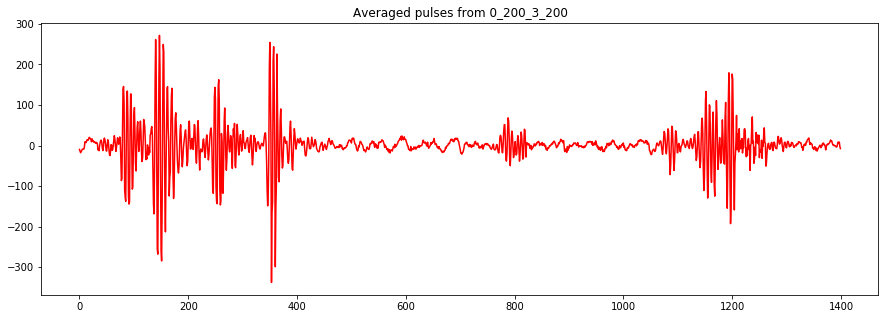

In [210]:
plt.figure(figsize=(15,5))

acc = rawSig[0:5000]
for k in range(8):
    s = (k+1)*10000
    acc += rawSig[s:s+5000]
    
plt.plot(acc[600:2000],"r") 

plt.title('Averaged pulses from '+RawData.split(".")[0])
plt.savefig('Pulses_average_'+RawData.split(".")[0]+'.jpg', bbox_inches='tight')
plt.show()
